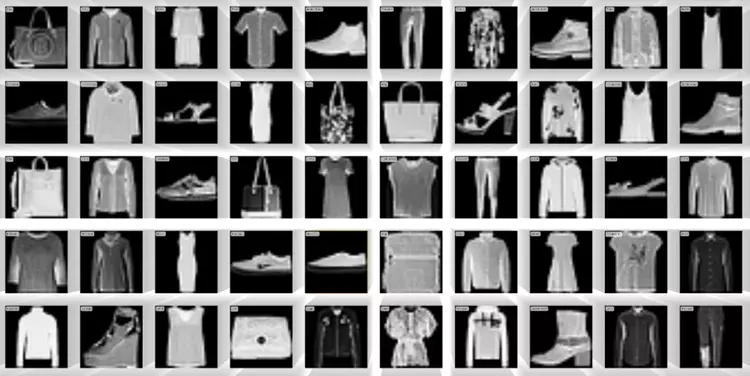

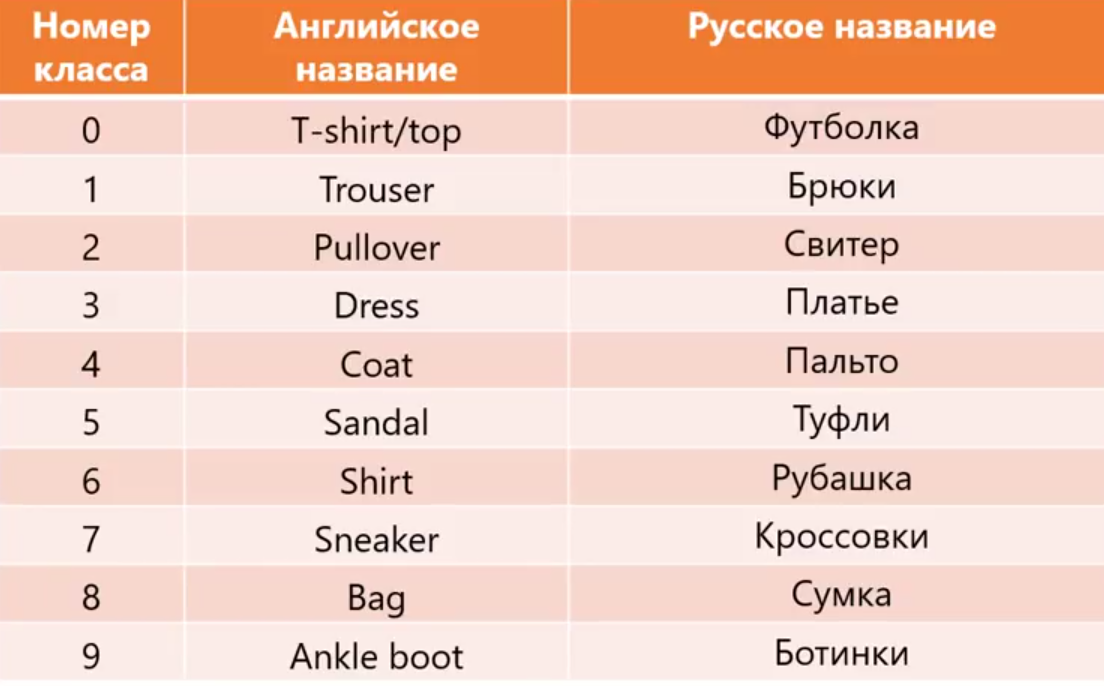

In [1]:
# 1 - Import libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

In [2]:
# 2 - Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

A fully connected neural network can't work with two-dimensional data, so pictures need to be converted to a flat vector

In [3]:
# 3 - Preprocess data (dimension reduction)
x_train = x_train.reshape(60000, 784)

In [4]:
# 4 - Normalize data (from 0-black to 1-white)
import numpy as np

x_train = x_train.astype('float32') / 255

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
# 5 - Converting labels in categories (one-hot encoding)
y_train = utils.to_categorical(y=y_train, num_classes=10)

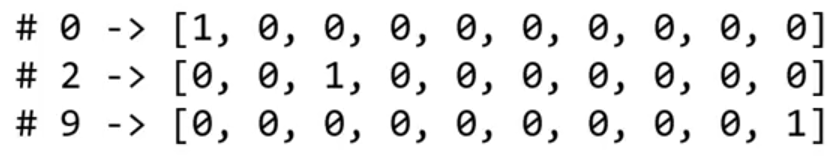

In [7]:
# 6 - Name the classes
classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boots']
classes

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandals',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boots']

In [8]:
# 7 - Create the model of sequential layers
model = Sequential()

In [9]:
# 8 - Add layers
model.add(layer=Dense(units=800, activation='relu', input_dim=784))
model.add(layer=Dense(units=10, activation='softmax'))

In [10]:
# 9 - Compile the model (SGD - Stochastic Gradient Descent)
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

Categorical crossentropy best fit to Your model if there are more than two classes

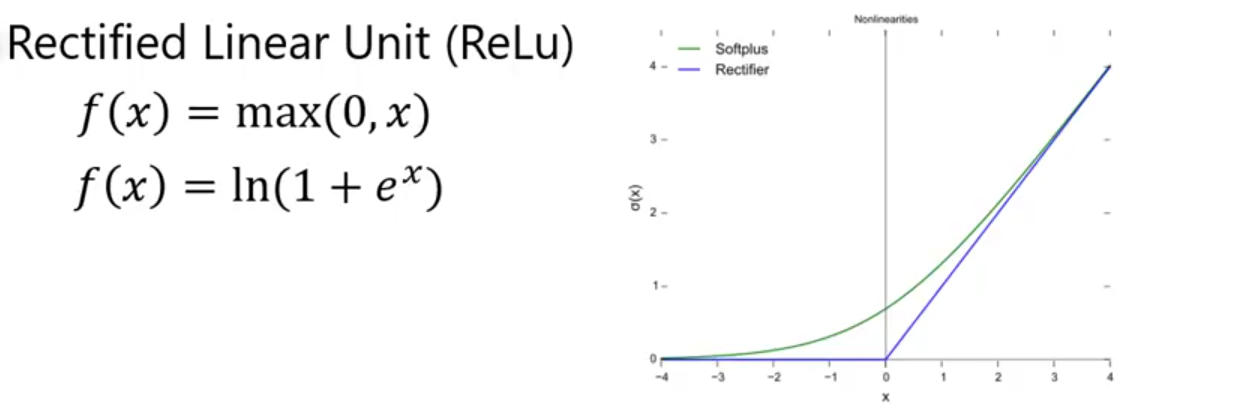

SoftMax is used to represent prediction in between 0 and 1

In [11]:
# 10 - Train the model
model.fit(x=x_train, y=y_train, batch_size=200, epochs=100, verbose=1)

Epoch 1/100
300/300 [==============================] - 5s 9ms/step - loss: 1.1129 - accuracy: 0.6820
Epoch 2/100
300/300 [==============================] - 3s 8ms/step - loss: 0.7175 - accuracy: 0.7758
Epoch 3/100
300/300 [==============================] - 3s 9ms/step - loss: 0.6303 - accuracy: 0.7990
Epoch 4/100
300/300 [==============================] - 3s 9ms/step - loss: 0.5832 - accuracy: 0.8127
Epoch 5/100
300/300 [==============================] - 3s 9ms/step - loss: 0.5517 - accuracy: 0.8206
Epoch 6/100
300/300 [==============================] - 3s 9ms/step - loss: 0.5292 - accuracy: 0.8262
Epoch 7/100
300/300 [==============================] - 3s 9ms/step - loss: 0.5120 - accuracy: 0.8301
Epoch 8/100
300/300 [==============================] - 3s 9ms/step - loss: 0.4982 - accuracy: 0.8342
Epoch 9/100
300/300 [==============================] - 3s 10ms/step - loss: 0.4868 - accuracy: 0.8378
Epoch 10/100
300/300 [==============================] - 3s 10ms/step - loss: 0.4769 - accu

Batch size are mini-samples (here we use pack from 200 pictures)

Number of epochs means that we trained our model 100 times on current dataset

# 16:00

In [24]:
# 11 - Detect clothes with train data
prediction = model.predict(x_train)
prediction[0]

1875/1875 [==============================] - 6s 3ms/step


array([1.6573180e-08, 1.4664320e-09, 3.4563910e-10, 3.3853903e-10,
       5.4418170e-10, 1.8209094e-04, 3.0185029e-07, 1.2010520e-03,
       4.6416185e-06, 9.9861193e-01], dtype=float32)

In [22]:
# 12 - Predicted clothe's number
np.argmax(prediction[0])

9

In [23]:
# 13 - Whether we predicted true
np.argmax(prediction[0]) == np.argmax(y_train[0])

True